In [3]:
#load the data 
import csv
import numpy as np
labels1 = []
labels2 = []
labels3 = []
with open('final_dataset/labels.csv', 'r') as csvfile:
    # Create a CSV reader object
    reader = csv.reader(csvfile)
    # Skip the header row
    next(reader)
    # Iterate over the rows and print the labels
    for row in reader:
        labels1.append(row[0])
        labels2.append(row[1])
        labels3.append(row[2])
print("labels load finished")

all_chunks = np.load('final_dataset/all_chunks.npy', allow_pickle=True)

spectrograms_array_loaded = np.load("final_dataset/spectrograms.npy")

144 impro have 3 versions
3 impro have 6 versions


In [ ]:
#visualisation - label repartition chunked

import collections
import matplotlib.pyplot as plt

label_counts = collections.Counter(labels1)

total_labels = len(labels1)

data = []
for label, count in label_counts.items():
    percentage = (count / total_labels) * 100
    data.append([label,  f"{percentage:.2f}%",count])

headers = ["Label", "Percentage", "Count"]

fig, ax = plt.subplots(figsize=(4, 3))
ax.axis("off")
ax.axis("tight")
ax.table(cellText=data, colLabels=headers, loc="center")
plt.title("label repartition after splitting into chunks")
plt.tight_layout()
plt.show()

In [ ]:
#visualisation - doesn't work anymore due to old global variables

#normalised sample rate
sr = 22050

# get the lengths of the soundwaves
lengths = [len(soundwave)/sr for soundwave in padded_soundwaves]

# create a line plot of the soundwave lengths
plt.plot(lengths)
plt.title('Soundwave Lengths')
plt.xlabel('Soundwave Index')
plt.ylabel('Length')
plt.show()

sorted_audios = sorted(all_audios, key=len)
print(len(all_audios), len(all_chunks))

# Get the length of each chunk
audios_lengths = list(reversed([len(audios) for audios in sorted_audios]))

# Convert the list of lengths to a numpy array
length_audios = np.array(audios_lengths)
print(len(all_audios[0]))


# Create the line plot

# Sort the list of audio chunks by length
sorted_chunks = sorted(all_chunks, key=len)

# Get the length of each chunk
chunk_lengths = list(reversed([(len(chunk)) for chunk in sorted_chunks]))

# Convert the list of lengths to a numpy array
length_array = np.array(chunk_lengths)
print(len(all_chunks[0]))

plt.plot(length_audios/sr)
plt.xlabel('audios index')
plt.ylabel('Length')
plt.show()
# Create the line plot
plt.plot(length_array/sr)
plt.xlabel('Chunk index')
plt.ylabel('Length')
plt.show()


Parameters: _wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=31129, comptype='NONE', compname='not compressed')


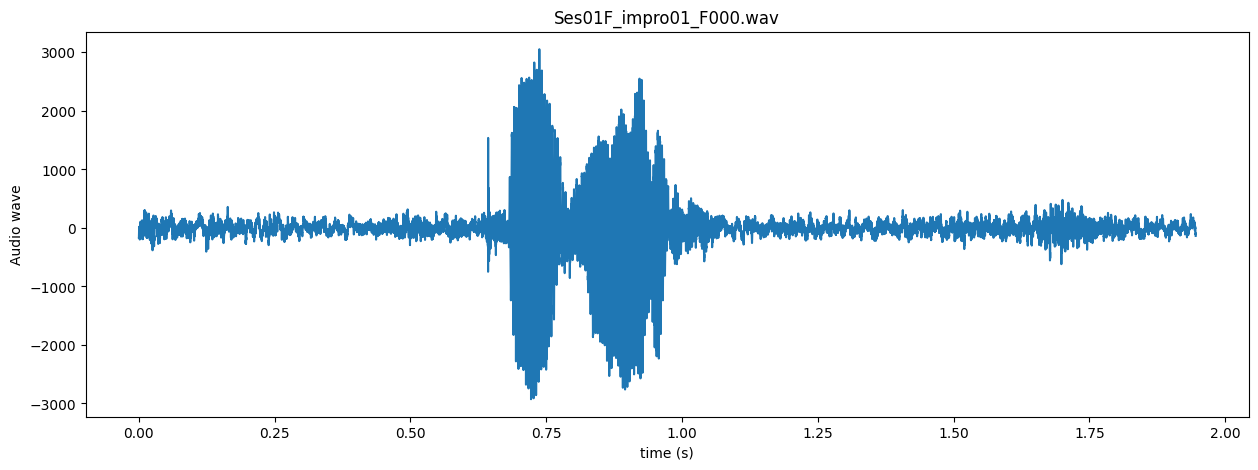

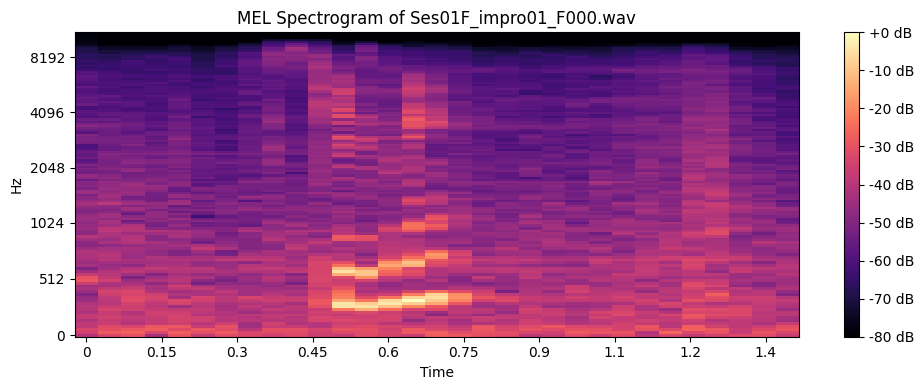

In [9]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import wave
obj = wave.open('../audio/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F000.wav', 'rb')
print('Parameters:', obj.getparams())
sample_freq = obj.getframerate()
n_samples = obj.getnframes()
signal_wave = obj.readframes(-1)
duration = n_samples/sample_freq
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
time = np.linspace(0, duration, num=n_samples)

plt.figure(figsize=(15, 5))
plt.plot(time, signal_array)
plt.title('Ses01F_impro01_F000.wav')
plt.ylabel('Audio wave')
plt.xlabel('time (s)')
plt.show()

signal_array = signal_array.astype(np.float32) / np.max(np.abs(signal_array))
sr = 22050
n_fft = 2048
mel_spec = librosa.feature.melspectrogram(y=signal_array, sr=sr, n_fft=n_fft, hop_length=int(n_fft/2))
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)  # convert to decibel scale
    # plot the MEL spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, sr=sr, hop_length=int(n_fft/2), x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('MEL Spectrogram of Ses01F_impro01_F000.wav')
plt.tight_layout()
plt.show()